### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\joewa\.virtualenvs\simulator-g4ninw5e\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:49: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
dataset = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 100, 2, "Unknown","Empirical",None, False)

Plot some chemicals

UnknownChemical mz=181.3566 rt=740.83 max_intensity=1.00


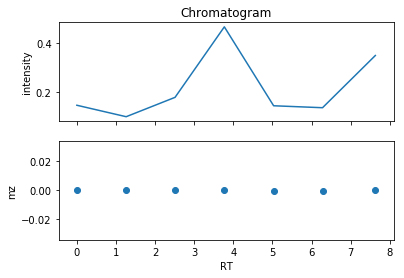

UnknownChemical mz=306.7825 rt=598.88 max_intensity=1.00


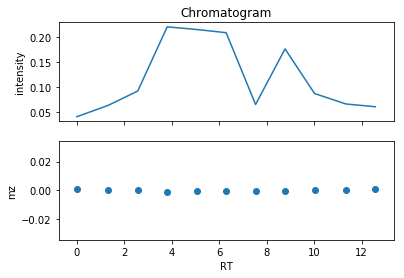

UnknownChemical mz=180.5837 rt=1039.14 max_intensity=1.00


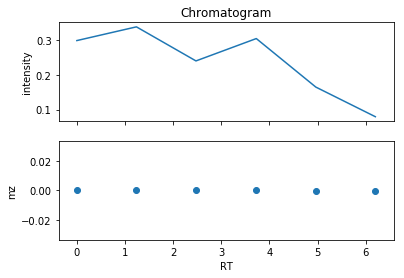

UnknownChemical mz=71.1436 rt=628.11 max_intensity=1.00


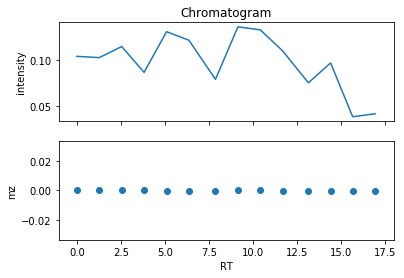

UnknownChemical mz=195.7669 rt=649.46 max_intensity=1.00


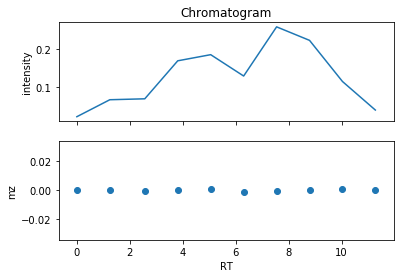

UnknownChemical mz=125.0428 rt=264.29 max_intensity=1.00


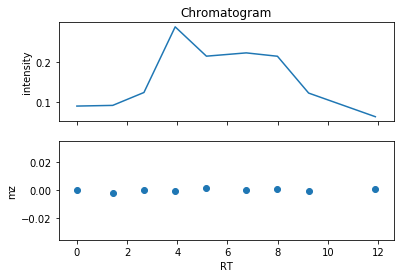

UnknownChemical mz=117.5252 rt=1158.29 max_intensity=1.00


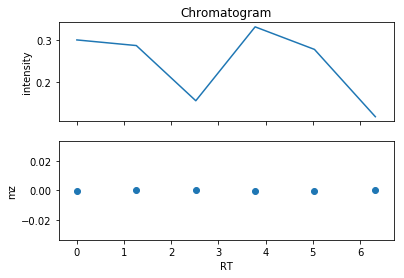

UnknownChemical mz=420.7497 rt=681.52 max_intensity=1.00


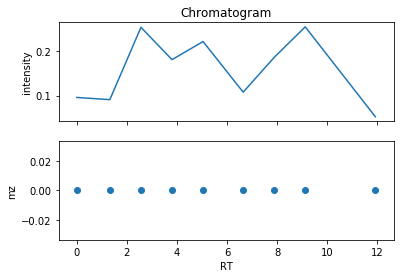

UnknownChemical mz=162.6802 rt=805.76 max_intensity=1.00


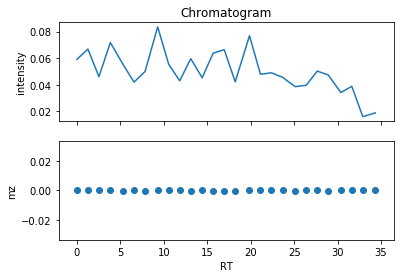

UnknownChemical mz=328.5879 rt=933.99 max_intensity=1.00


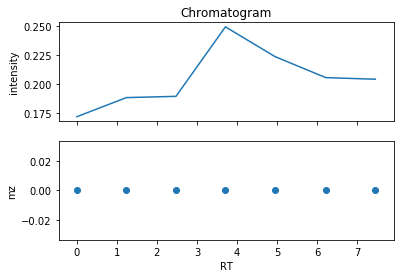

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Set up a simple controller

In [21]:
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, "Unknown", "Empirical",None, False)
initial_scan_parameters = {
    'isolation_windows': [[(0, 1e3)]], # TODO: change to dictionary?
    'ms_level': 1
}    

Acquisition open


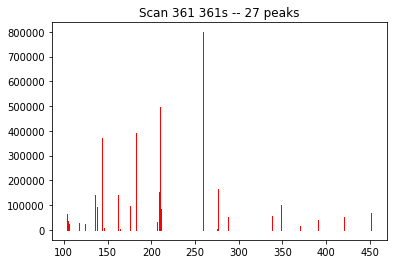

103.70652448714347 65224.959931565056
104.70151508400502 36955.432856246494
106.28127836679319 23113.435215552418
117.61197685460895 27431.37151987907
123.99334333229505 24526.184265713287
135.79590231833203 140689.74733605835
137.70101339154198 92356.21861968865
143.7706671787799 372947.68889512715
145.60954035084424 6573.496421590633
161.48814782242653 142164.81653558154
164.08399243996996 2061.6210889164054
175.3947128027114 96244.11457169705
182.5995630278935 392435.1580288382
206.17337252094606 30670.31430429177
208.54823090779382 154337.98811379104
209.62739761955035 495112.44201673346
211.0541540698434 84764.7223874624
259.0958714747666 797914.8922133872
275.3962204439169 2687.0293899312865
276.8212415007332 163654.09505387695
288.17231773677617 51281.395409908015
338.14691566623816 57455.49014730141
347.8496856515366 99621.80182843513
370.43860990170964 16005.833933681408
391.2082010989242 41661.14763074213
420.3254647101265 51391.3010209707
451.80076367509724 67660.2935702275


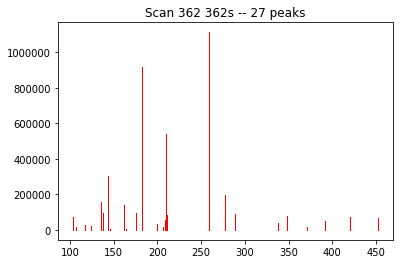

103.70652448714347 72784.28303574797
106.28131308302319 16454.869605864988
117.61199491947366 25723.7353997895
123.99262079335237 19684.215546157444
135.79578268855755 155284.2034157221
137.70106527471708 97659.59303076263
143.77152155575178 305644.90455816203
145.60953333176795 7091.9863274670015
161.4881109950999 142351.86207146256
164.08401189537062 2465.6665246357356
175.39460047179347 95708.01899336297
182.60052053838993 919255.7263944561
198.95469829180274 34281.22417073453
206.17316175690695 17809.023396083678
208.54771654611974 57281.4075103586
209.6275125043416 537046.2982973233
211.05413441829904 85294.71342823686
259.09611902163687 1112223.231040528
275.3962295877751 2241.6285707039397
276.82115483143787 198595.23431258678
288.1720342177839 89326.64945491955
338.1468695656405 36981.68781127359
347.85001683104224 80731.89360718153
370.43861397303635 16932.470429840923
391.20817739017986 48476.97581827312
420.32541866094545 74266.63840320616
451.800792584387 66191.49278522904


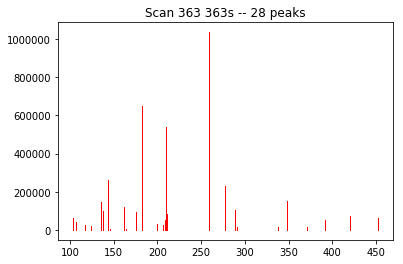

103.70657963895391 64668.406905353666
106.28128843231399 43153.59474209197
117.61201767654985 24279.675900142724
123.99238031266891 22367.472788744453
135.79582838890252 144653.25026996585
137.7010099636912 96732.59195652152
143.77157093694592 258970.00364303336
145.60952063924614 6499.085636499549
161.48807416777328 119600.04930709567
164.08399934345073 2400.25727570653
175.3945814016696 94557.75893407711
182.601514768198 650180.7056066123
198.95477322669478 29144.523981253496
206.17328474988443 23780.621573058866
208.54801069145154 50813.45126490278
209.6274760289337 539255.3485931377
211.05412290980894 81201.0577582508
259.0961738173569 1035134.4208149948
275.39623524429334 1659.8786711634204
276.8210591581464 229931.19617630867
288.17204689617756 103757.01978736803
290.62372791644526 15168.90897770482
338.1468450338254 16087.782795213876
347.84978332131584 150576.92990707434
370.43861397303635 16868.55922879047
391.2081332682576 51928.477582382286
420.3253837171538 71891.0298965169

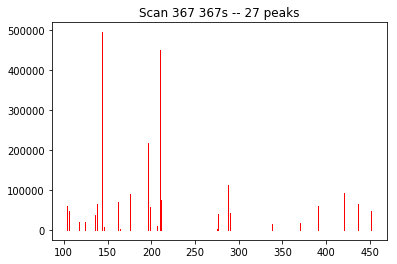

103.7065955317302 60066.43549283049
106.28137154959768 47621.79253275066
117.61198116128409 19643.325927320086
123.99259312637174 20651.587262541405
135.79584852358016 37001.98685347982
137.70088879097688 63928.90662246895
143.77179321477354 494850.6346425014
145.60954435854666 7326.985781129507
161.48805740673632 69765.03371451412
164.08398147111194 2434.673914943111
175.3947843087749 91141.5956429907
196.86121690984766 217262.56798036338
198.95500082131264 57502.658683183385
206.17289063631355 9239.588935959144
209.62748725641072 450715.61437072663
211.0541349133206 75713.27206161666
275.3963083122353 2215.410153829658
276.8214285319718 38823.700066820966
287.5996765546851 1459.5757338716585
288.17237503608607 113501.0933518076
290.6234873671562 41439.38924352183
338.1466668007982 13715.988576304631
370.4385948509742 17280.772432245278
391.20802992927145 60662.51930024765
420.32542197254253 93098.72818714792
437.0308079388501 64263.504485132704
451.8008302573067 46178.90047621345


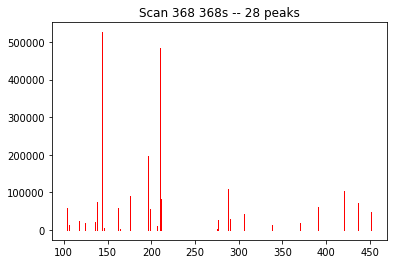

103.70656690991261 58751.581773917576
106.28119913390196 13176.687526992439
117.61197535873742 24360.01234455606
123.99300936116282 17664.909106016956
135.79570491144844 20966.35010687363
137.7008274614391 75483.64687359755
143.7717442351837 526146.8639512453
145.60950756642794 6285.6409547702
161.48801852637718 58595.801018492544
164.08399224834912 2592.931534993417
175.39487552673643 89632.24423462512
196.86138849462438 195641.50649867076
198.95470333161148 56800.48007904585
206.17268739762042 11176.918088059383
209.62746658743836 483920.4380727094
211.05412638975235 82600.45918149839
275.3962592091331 1684.9528114113866
276.8212996477114 27337.3208584059
287.60036124393747 5601.222945918535
288.1725141312875 109951.07683215963
290.6234631698836 29904.974250567797
306.40747125824225 41818.46990483083
338.14662162106924 13753.031117259441
370.4385965903498 17635.83699435889
391.2081266221673 61915.37661867872
420.3253609373865 102794.41252887473
437.0308079388501 72745.24120721708
451

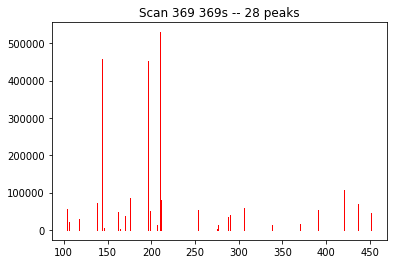

103.70648266856303 55940.14529206745
106.28114761936236 21772.887550743486
117.61201053743396 29916.919876588698
137.70089765521195 71262.00536266496
143.7716950418948 457469.2000624312
145.60954030665272 6242.745183638127
161.4880132081198 49099.388908054774
164.08408643840528 2634.737859675792
169.8210260016944 38379.10460304309
175.39511313013688 85922.74095913666
196.86136774571662 452750.19732676644
198.95420130057667 51100.02641608243
206.17253538753926 13656.639270884729
209.6274486278677 529466.6213779082
211.05413242089423 79950.7363623089
253.50937464681425 54274.253101683986
275.3962100731354 2433.4228010016177
276.82050649283457 14330.898171784174
287.60010845531434 9316.130952794576
288.1727616314068 34342.64271241793
290.6234631698836 40841.527816014415
306.4075461176447 58087.90279591224
338.14657644134024 13790.07365821425
370.4385910848524 16310.361305747118
391.20821283001555 54409.4394417267
420.32538748348395 107591.28460851476
437.0307713470952 70537.01549110244
45

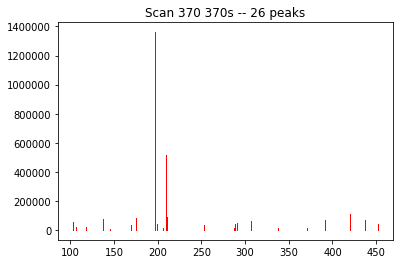

103.70672334346915 51193.149990695565
106.28116707341204 17304.351100171807
117.6120263006458 22586.447770103445
137.7009277190985 75643.68551549618
145.60957476854054 6403.670930031433
164.0841115550481 2140.5229170367224
169.8211540700077 35959.955853264546
175.39506386850974 80723.08097971963
196.86138790167954 1360443.1112898856
198.95427483690924 40525.63491798377
206.17254286001184 12409.647315227256
209.6274862492601 515790.4156932507
211.05413827159944 85668.35018383473
253.50956764335575 31689.944819947974
275.3961899263389 2708.7662807456163
287.59965435183227 10317.497768010444
288.1721812654194 37290.40125461108
290.62350775718517 46469.80017008263
306.4073478596063 63748.81433512256
338.14653126161124 13827.116199169057
370.4385910848524 16087.411048880993
391.2081322385432 68386.3758958701
420.3254029671577 106235.25937741552
437.03078066527854 68329.84568739329
437.4458408639823 52009.09429883403
451.800783925072 38561.1277882605


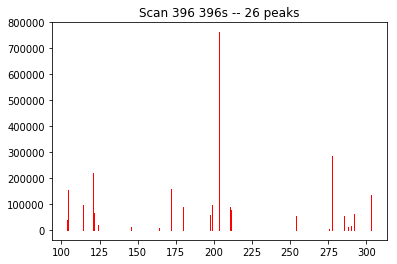

103.70663264510178 39694.87186803204
104.33601698655335 154646.95903796196
114.08901558201515 96968.43015318947
120.86405688903984 220732.92807097698
121.23266967958644 66051.80814257478
121.4777716470244 50456.271388916706
124.267238416343 18468.274456146384
145.60955419702438 9382.773246613015
164.08402885579622 5883.465149221075
172.09300531332474 158787.3586794094
179.40927994760654 90058.70273664624
197.45301110811062 56019.32054394897
198.72196437267107 96741.1740418822
203.45083556603913 761503.988379639
210.50469336752735 88035.2799688782
211.0541320554644 76221.09012780139
211.42603364595925 38696.392056589895
253.50963737973711 52414.05615434876
275.3961348930772 1817.8129620389434
277.58889903369595 285277.74552694615
285.2064211283018 52983.554574264046
287.6001489946423 11631.48392400533
289.8073424979261 14653.875204173279
291.6340667499961 50457.32722232567
291.81861301686234 62259.115523532426
303.2237487076733 132712.3663660043


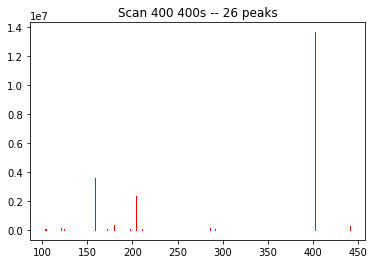

103.70653487001842 55190.69067412065
104.33587691997653 60399.599190402216
120.8645861374998 112507.66396337184
121.23224353499053 70276.64021257988
121.4775340142454 64412.41022313614
124.26686980348043 62825.87635673133
145.609552834918 8346.354347295102
159.06201302744674 3592801.819201047
164.0840724216824 4133.145983837613
172.0926831066789 81822.29854945993
179.40946788271668 327591.35078465566
197.45306985869297 44966.54755947709
198.721963040298 24077.566392531466
203.45069991187128 2372790.793232635
210.03255246181763 11180.444787232374
211.05416515625078 64207.51812996796
211.42610445378094 21007.337917605357
253.50965878310265 27742.17922085072
275.3961095417631 1710.2849170918814
285.2065404656731 166737.44728726547
287.60029925826194 5136.189555437447
289.80730025606914 4248.534401306265
291.6341080678627 51077.78364135903
291.8191910354516 53445.33994917443
401.4016893112161 13671421.894912899
440.3571342844274 283192.52334481967


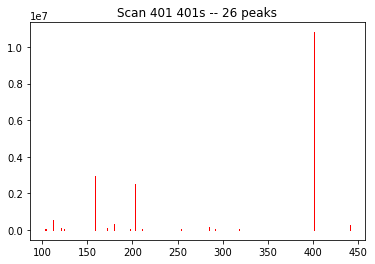

103.70646394079485 41218.283592312975
104.33612725948434 54377.206687372214
111.75665412180264 520901.8587371773
120.86448131443285 100170.38599229224
121.23235458696769 38686.25229957457
121.47745986124934 84522.9759532872
124.26680070197736 71578.10134067462
145.60953477929823 7840.978696264149
159.06255471238546 2962357.3690307233
164.08405931584923 2482.4431862922543
172.0928060127526 88989.35580447677
179.40936927987985 312128.77884942706
197.45302981107628 50784.442832900786
198.72211535467184 14780.154584005331
203.45069601133915 2507954.41764598
210.03239850349115 14162.562754295019
211.05414295134892 68396.70856098858
253.50985162719743 29719.033101259804
275.39603939856784 1557.0171060363223
285.2065889937106 136229.47786401588
289.80732261326915 4445.383647844781
291.6341978254451 46872.111841892816
291.81916968671334 64826.72788720896
317.96155970103234 68006.94770433883
401.4014918047005 10809519.771365603
440.3570700422875 274952.4318226179


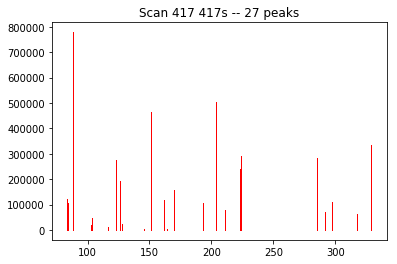

83.45775993556563 120805.92932000515
84.42788911922139 105423.66711853619
88.25594523841622 778235.8755354753
103.13324079711307 19321.9343671794
103.70651710038814 47574.2305884396
116.50724677458864 9559.208876233199
122.61656489151476 273485.36560137785
126.10262509562595 191538.7889581699
127.55693338325 23418.6210086807
145.60956198468068 5163.934965469566
151.25830408738685 464999.8405115329
161.79466357724203 117871.16746636576
164.08418360084463 3725.3643462981295
169.96494651583026 156727.01655250974
193.425353022041 105459.85994531646
203.58839195097045 505129.03062082554
211.0541302431529 77307.77611623539
223.0535519249711 238743.95556490286
223.94250553397163 290527.1770558244
275.396172715862 1059.1433626297887
285.6643153026961 281262.32671759574
291.63407234459 52861.091923027816
291.8190343619177 60745.63553864165
292.10884353758286 70501.5289247126
297.5760102509662 111241.34513845103
317.96153325403316 61613.32615769071
329.25950933539366 334548.98012861493


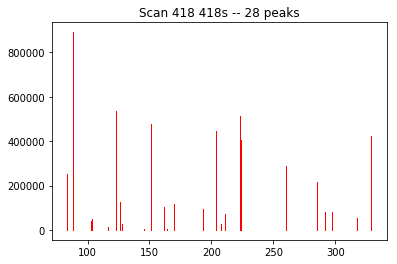

83.45771095068923 252326.92075401577
88.25556438297258 890403.7085768316
103.13329504162049 38636.948426558476
103.7064930897052 47235.35052750825
116.50723457731526 13369.586669950711
122.61606662300814 535296.8530840831
126.1026359176907 124251.9271243038
127.55688420709467 26990.378905709207
145.6095520646615 4825.864949179372
151.2583759379508 476190.85094208823
161.79478653283508 104092.41717692924
164.08414847831216 3937.226934803571
169.9649905340211 114720.85017518107
193.42528390073045 94591.49385394303
203.5884361277093 445912.4932198491
207.5614739947445 27006.39052824583
211.05412958145348 71444.02003747909
223.05361001630328 513381.8234616105
223.9424747250332 405054.18312705925
260.6209167846256 286696.278027521
275.3966106531307 1499.0945068417898
285.6643747092828 217381.29238285345
291.6342248710056 51534.832402517546
291.8185191937988 79793.46740719002
292.10881900576777 53062.37511898815
297.57631069928266 82218.97785630978
317.96153325403316 53189.94161490073
329.25

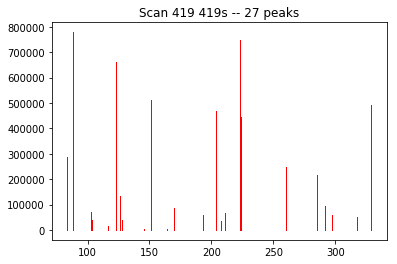

83.45769171398334 286698.463949512
88.25556784211886 778631.6416167148
103.1333015997561 69477.84715262573
103.70646907902231 39394.49173070012
116.5072513561962 17108.762294608583
122.61587587855983 662026.4669424042
126.10265669406147 135380.04616594713
127.55684878948549 40186.36323735961
145.6095328886556 4836.622788150039
151.2581296298144 511829.13956200593
164.08411335577966 4149.089523309013
169.9651751161469 87557.94217259038
193.42511894084868 57792.381886545416
203.58836523902596 468133.21374196897
207.56235785058757 35681.98531141395
211.05412891975405 65580.2639587228
223.05346021051994 747407.443628988
223.94244708867984 445092.3510277549
260.6213947375754 247454.81384670708
275.3963276272049 1579.2504043909332
285.66390822981054 217602.87504775144
291.63426238806255 49931.63833141143
291.81901337079455 92651.97861822936
292.108816956126 47657.29252219992
297.5763832425376 58236.22769269382
317.96152671069973 50522.17993493651
329.2594736138687 490213.5629045342


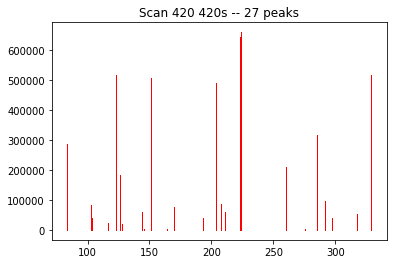

83.45769838486113 284711.72186869755
103.13322878983294 83359.12010011477
103.70648190824083 38303.82824013837
116.50722191205767 21769.793230128893
122.61584399387229 514892.5454113312
126.10268522581337 183675.52854834785
127.55658652904879 18381.183956134308
144.0879318681508 59337.80258257768
145.60951690843618 4184.615264941057
151.25822341983465 507053.32398127887
164.0840367697076 4164.76144217502
169.96508164509387 76348.8090620506
193.42561981274233 38700.17961151661
203.58829435034266 490353.9342640888
207.5610797643073 87777.05796428438
211.0541282580546 59716.50787996649
223.05399927622878 643924.028936331
223.94243473338506 658494.0296673727
260.62129828733873 208830.89448950172
275.39641063795284 1559.5365908004167
285.66424998284856 314608.0087466293
291.6342173663304 48021.15347622934
291.8193117840821 95877.39986328056
292.1088623577511 40961.50985135106
297.5764323851753 41171.94355185349
317.9615210407455 52198.698092474246
329.2594451243426 517395.9744157327


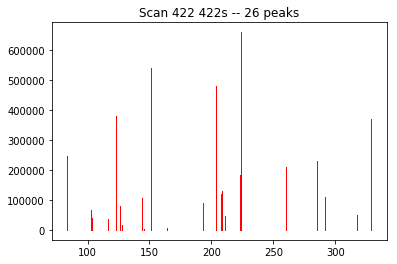

83.45771688882918 245085.9799398868
103.1332360071681 64700.60428976217
103.70647746499297 40221.42405080975
116.50703615523945 35837.09843778023
122.61598060044138 378801.2141309984
126.10267356171707 80569.05788507781
127.55682253071389 15551.675361300864
144.08787526946887 107127.44145642401
145.60954635705886 2136.1507739892563
151.25827997970208 540153.4293058654
164.08396182017017 5484.389047914601
193.42578397142555 89185.14064256006
203.58768292498348 480843.2143758721
207.56223697115684 120193.01294810197
208.6494496745718 130677.84893191182
211.05412693465573 47988.99572245391
223.053370439837 184348.77391968257
223.94238604532384 658336.2565642805
260.621658044709 209956.62016073088
275.396090940254 540.7266518296307
285.6642471286125 230001.31606832598
291.63419896091665 38146.09659341056
291.8192593014086 110539.22463628917
292.1088634899163 49062.22604033603
317.9615675852818 51235.53221963108
329.25950497437265 368639.31034598633


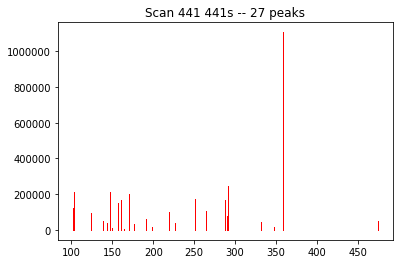

102.24230915359226 123414.85579497312
103.13311640910736 211364.34565942475
103.70701652805853 10327.424181407585
123.56778466613028 96065.2918448178
138.20397224672857 48530.82933425478
143.43315885411542 41024.52136031973
146.84949572624495 212340.48293781158
149.57518135716833 9160.131182443873
157.1648577627103 151640.30245395872
161.1128778923757 165086.37241700522
164.08390161391253 3266.7373561904537
170.88013587233766 202446.2316478683
176.0604167322103 35416.945805832336
191.41128865940635 60959.96247413394
198.82755979928447 14238.507363577775
219.67991186249225 101708.73207445226
226.8078582702974 39758.676344707004
251.19228834418803 170640.19117028135
264.5372467982523 107474.36980790953
275.396191490017 488.28590884306095
287.345798782237 167430.1402172021
290.1436378611715 79219.94770608441
291.81932262409737 243639.08907665403
332.0083590403448 45708.03918985689
347.61317317616755 17410.2255486404
358.35365393972427 1106569.2945371026
474.5816634245504 51783.84241124627

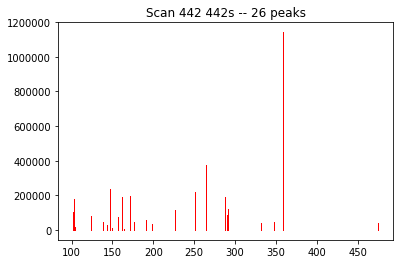

102.24227217520796 101948.29041147685
103.13319137966567 178543.48310223155
103.7065102315645 14242.942533286427
123.56778466613028 78120.24663791932
138.2039660939907 45608.000831126534
143.43291333860378 29543.548782606158
146.84949816815538 235008.23093273226
149.57511949365212 9569.310537781384
157.1645915173154 74793.88835011303
161.11290603637988 189503.75983944073
164.0838728779634 3284.6073958384595
170.88008526018555 194057.35022790768
176.06043701214236 46457.65422683281
191.41130678731008 57668.767108605614
198.8271395899031 32462.262811595712
226.80780982969722 112896.08418319326
251.19225419366856 216491.15350722437
264.5366608607531 377547.39812864666
275.3962695400889 492.2100524520453
287.345729729473 192037.1751816224
290.1436458798927 83334.69333742984
291.81903723527444 118765.46276119027
332.00836586439857 42343.607917690926
347.6126879672182 44102.018410942896
358.35371026255507 1141712.1057954682
474.5808879386715 38552.861129037694


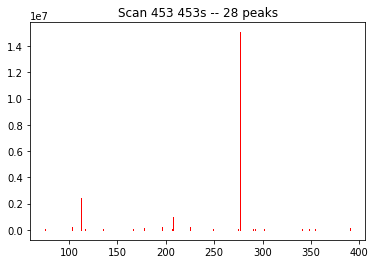

75.67148437501491 42879.587661078585
103.13342593356316 192356.40655815817
112.03386737308881 83251.98006099192
112.536570950582 435181.6870383769
112.55214600839365 2403793.9766734294
116.54436654118368 41485.68128182047
118.86814647136774 4308.147635891781
134.7731619715989 53296.722765133985
149.57537679570993 28136.155098496638
164.08379302937246 2508.809353888307
165.83476823428072 63167.90912193396
177.44084933504573 142750.24812960494
196.0639660299338 196463.9741713757
206.46209742638 54176.90499356348
207.49336374819833 1019298.3221757044
225.0235157271554 90190.22319243205
225.14130910070796 187997.6075912955
249.09961730463633 102327.86462578231
274.4137672646687 54532.46254289481
276.71735869427187 15045283.404044807
290.14360179801605 78852.82001841415
291.8193129060318 98949.82657479955
301.5109467275329 32071.079167932985
303.72721344993863 8153.062703538018
340.20370148527553 76889.87560052852
347.61241166704286 46787.72920940351
354.4242429993545 56899.970808311235
390

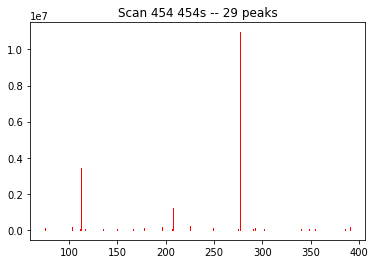

75.67142359884576 118479.25353831536
103.13327778997994 136107.6939003552
112.03398089166782 64438.23027019565
112.53685663496087 410586.27770009724
112.5519742493402 3454891.7796833673
116.54437155390596 43722.60182605933
118.8680816635834 22627.858032780627
134.77320316796005 75108.6917450083
149.57522948640258 27503.73636235351
164.0837920755789 2538.1564812008837
165.83472402550655 73531.16576081881
177.44063289832155 84674.62763132488
196.0632796908278 173840.9860842091
206.4620662617722 54884.74815481055
207.49336917779272 1224247.8364968037
225.0234977049633 87915.21057952441
225.14125933055118 244444.01643910262
249.0995695462983 90826.35241544052
274.41377190858304 50165.83461658661
276.7173679106205 10954326.871673856
290.1435840557428 69374.233879691
291.81923858446646 94630.56063997245
301.5105862836967 27815.658366082815
303.72733353980675 17057.92427550478
340.2038486761662 75591.38762965056
347.61293730409176 49072.595626270115
354.42433142766805 70209.30728544119
384.99

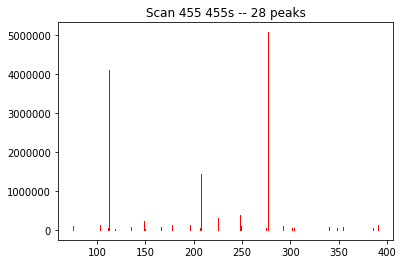

75.67138644687259 112723.25070133738
103.13309701520666 127767.49502876501
112.03403556065223 55868.99311656839
112.53787774387969 395133.3815146162
112.55195100637536 4084971.970368365
118.86804561572586 33303.421135325596
134.7731155878187 75691.52951242954
148.60322894515164 232394.45151222867
149.575128156549 27038.199539255093
164.0837911217854 2567.5036085134598
165.8346258193022 84276.1578733669
177.44075177696035 114199.14245407541
196.0632706417393 126512.27914410946
206.46192114637128 49022.63631534528
207.49333660399503 1432875.7517779397
225.1412527382962 302067.75119401613
248.32407310807983 392810.51837183296
249.0998091128212 91293.51085562812
274.41381858585163 47638.696114519575
276.7176418944023 5064821.825571039
291.81916426290104 90311.29470514535
301.510531436618 43865.8642450547
303.7273609002272 38874.75766651966
340.2039564942428 75787.09275587878
347.6135162265174 48715.20265353289
354.4243028887859 86076.38999136155
384.99723297231134 48316.58314973811
390.068

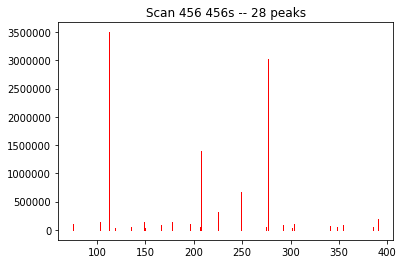

75.67136618490206 104860.01838008699
103.13300730695795 143809.21046796622
112.03416627914474 55480.075018501004
112.53789710429396 626738.5909414847
112.55206615575653 3494699.3516084803
118.86804561572586 34218.773341658496
134.77303271925877 50417.92069797364
148.60193124516084 142474.23758601828
149.57526814529294 25117.619579298516
164.08379016799185 2596.8507358260363
165.83475758606474 82417.6525285699
177.4407724406755 142843.29916272068
196.0635567735262 101458.53072776455
206.46104224012174 48851.95914288481
207.49327517569793 1396560.890512232
225.14121646542222 319729.0846229559
248.3245274415269 672869.0867174438
249.09988613647573 79748.08486267211
274.41386067882974 44769.675208454384
276.7178711008628 3017550.396800683
291.8190899413357 85992.02877031824
301.5105455907489 42471.13409471025
303.7274102016456 106749.98554197008
340.20395949658644 67851.53429119362
347.61341581011686 47937.11327426023
354.42430886430276 87385.51936492587
384.99765440445 45992.904722372674


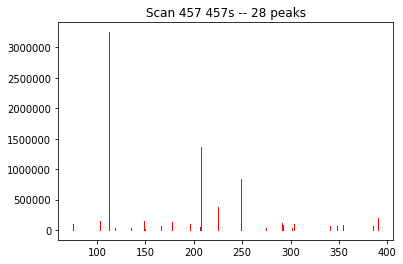

75.67137738288545 99504.81013395867
103.13306580097334 152124.01533291946
112.03406745644804 46509.83009357725
112.53757638601184 436753.4158064077
112.55161492308419 3249658.5445545893
118.86804561572586 34216.83747682479
134.77302618180357 28497.46547670134
148.60254599992325 141125.5738025126
149.57533707541134 22643.78014981863
164.0837892141983 2626.197863138613
165.83478214124736 69283.73075392775
177.44074252836234 134968.63001830553
196.06365100911876 90573.33821988545
206.4619864400733 45086.409228867065
207.493354705953 1362065.0263791613
225.14130237778107 371811.2607342726
248.32434704528615 842766.7829497932
249.09978082091763 67818.18018944123
274.4137825746703 36236.35327161093
291.52591689382416 119887.17303209154
291.8190156197703 81672.76283549114
301.5105306141191 27337.77185392582
303.72734271706054 99403.04619238139
340.20390283646066 59024.46699428947
347.6115852371587 64584.816539144325
354.42428415087403 87786.13594090051
384.9978862622155 67186.45532999128
390.

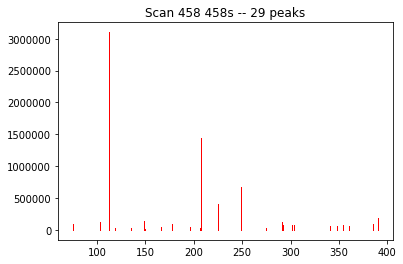

75.67141643749996 97528.30489636032
103.1331640071777 118646.24857685827
112.03359795524668 20839.47549460286
112.53709445342182 268701.25619269366
112.55210768162259 3100697.713284286
118.86802391383672 34203.82151620477
134.77351919599022 32176.893873977264
148.60329845435535 146154.19720836607
149.57527544987403 21971.165233603708
164.0837882604048 2655.544990451189
165.83473210992952 51153.62539386338
177.44094506694378 93171.52652438289
196.0630737850787 47322.62086191148
206.46226925710394 33967.88057840231
207.49335576067426 1439773.0903146258
225.1413141336765 404350.96934823267
248.32451849235431 679788.4756606151
249.09956098972788 66446.01647270075
274.41378172532893 32573.747207016528
291.5260012547869 116647.81799843512
291.8189412982049 77353.49690066403
301.51055373349635 71292.99791714556
303.727273339634 76463.01638287774
340.20388397516336 63588.30600223393
347.6129100043429 56891.13808731849
354.42422180328936 81122.53224025137
360.3354023307519 53887.69960786917
384

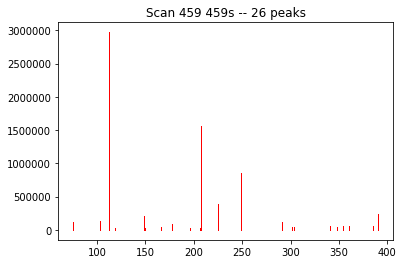

75.67138847597788 111557.30413958215
103.13324249024356 130287.95518679907
112.03378867432127 22361.799527612475
112.53725873382733 202077.66335199034
112.55174152051218 2970049.928442271
118.86803285218721 33661.44267769804
148.60355838107486 205198.54918874192
149.5755448666959 27816.12817896242
164.08378730661124 2684.892117763765
165.8348483291055 36912.2921625502
177.4410553980291 95396.49609135305
196.06353020025136 33910.69390554521
206.46178939938125 23370.98922188891
207.49332062658752 1557036.355677788
225.1412561589303 382801.16978613276
248.32446306492113 852667.6172217462
249.09951315653353 60826.57818107394
291.52590394838955 121459.55992161525
301.51061087541456 46892.27272531574
303.72724251751646 50868.81256635339
340.2039287385864 60598.567106614544
347.6136856709447 46038.79343645985
354.4241470212658 61760.50145263665
360.33505558646925 61831.67624893241
384.9974519667158 56237.39909992689
390.0688075116149 232108.79293127276
Acquisition closing


In [22]:
mass_spec = IndependentMassSpectrometer(sampled_chemicals, initial_scan_parameters)
controller = SimpleMs1Controller(sampled_chemicals, mass_spec, plot_peaks=25)
controller.run(max_rt)